## Final Project Submission

Please fill out:
* Student name: Rashawn Wilkinson
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Road To The Emmys
Today, we will be making data-driven inferences about movies to achieve box office success. We have received several datasets to analyze and make calculated assumptions. With this data, we will devise and answer meaningful questions that boost our chances of not only receiving a sufficient ROI, but to bring in profit well-worth every penny put into our film's production. 

## Importing our packages
The first order of business is to import all necessary packages that may be used to answer our questions. We will be using powerful tools for calculating integers, strings, and several other data types that may arise. We will also be setting up charts and graphs that will visually represent trends in our dataset(s).

In [1]:
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb
import sqlite3 as sql

C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from glob import glob


In [3]:
import os


In [4]:
import pandas as pd


In [5]:
import numpy as np


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import statistics as stat


In [8]:
import seaborn as sns


In [9]:
import sqlite3 as sql

## Importing our data
Once packages are imported, movie data in regards to gross sales, title ratings, and other bits of information are then imported. 
<img src="https://rolfje.files.wordpress.com/2015/01/61c1ee2ce9d31c894d188b7b17cacee90ffdece8bc4c4798d10100b7515820de.jpg" alt="Loading..." title="Blessed By Code" />

To unpack all the zips we have available, we will be using the method 'glob'.

In [10]:
csv_files = glob("./zippedData/*.csv.gz")

Now, we are going to separate our csv files to access each of our individual datasets easily.

In [11]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

Let's double check to see if we have successfully extracted all datasets.

In [12]:

csv_files_dict.keys()




dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [13]:
mov_gross = csv_files_dict['bom_movie_gross_gz']
imdb_credit_names = csv_files_dict['imdb_name_basics_gz']
imdb_title_akas = csv_files_dict['imdb_title_basics_gz']
imdb_title_crew = csv_files_dict['imdb_title_crew_gz']
imdb_title_principals = csv_files_dict['imdb_title_principals_gz']
imdb_title_rate = csv_files_dict['imdb_title_ratings_gz']
tmdb_mov = csv_files_dict['tmdb_movies_gz']
tn_mov_budgets = csv_files_dict['tn_movie_budgets_gz'] 

Without access to the glob package, we are still able to import our data with pandas. Assuming pandas is imported as pd, it would look something like this:

In [14]:
#gross_df = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#title_rate_df = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_df = pd.read_csv('tmdb.movies.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_info = pd.read_csv('rt.movie_info.tsv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_budget_df = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)


<img src="http://www.quickmeme.com/img/14/1490ff023ac62f215a12a2b022b4cb6da9e2935688b22cc6b4ad75788ad98816.jpg" alt="Loading..." title="Blessed By Code" />


Now that the appropriate packages are imported and our datasets are prepared for analysis, we can go on to asking questions that can be useful to stakeholders. 

### Question 1 
What is the highest grossing film domestically?

First we will check and see if our list of domestic_gross entries match the amount of data entries in other columns.

In [15]:
tn_mov_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [16]:
tn_mov_budgets['domestic_gross'].isna().sum()

0

We can see that we are not missing any values.

In [17]:
tn_mov_budgets['domestic_gross']

id
1     $760,507,625
2     $241,063,875
3      $42,762,350
4     $459,005,868
5     $620,181,382
          ...     
78              $0
79         $48,482
80          $1,338
81              $0
82        $181,041
Name: domestic_gross, Length: 5782, dtype: object

Let's remove "$" and commas to set our values to integers.


In [18]:
tn_mov_budgets['domestic_gross'] = tn_mov_budgets['domestic_gross'].str.replace('$', '')
tn_mov_budgets['domestic_gross'] = tn_mov_budgets['domestic_gross'].str.replace(',', '')
tn_mov_budgets['domestic_gross'] = tn_mov_budgets['domestic_gross'].astype('int')

In [19]:
tn_mov_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   int32 
 4   worldwide_gross    5782 non-null   object
dtypes: int32(1), object(4)
memory usage: 248.4+ KB


In [20]:
tn_mov_budgets = tn_mov_budgets.sort_values(by='domestic_gross', ascending=False)

In descending order, we have our top grossing domestic films.

Now let's take a look at our data.

In [21]:
tn_mov_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225,"$2,053,311,220"
1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566,"$1,348,258,224"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482,"$2,048,134,200"
43,"Dec 19, 1997",Titanic,"$200,000,000",659363944,"$2,208,208,395"


We're in good shape. Now, let's get a graph to visualize the highest grossing films.

#### Question 1: Visualization

As we can see, Star Wars Ep. VII: The Force Awakens is the highest grossing domestic film.

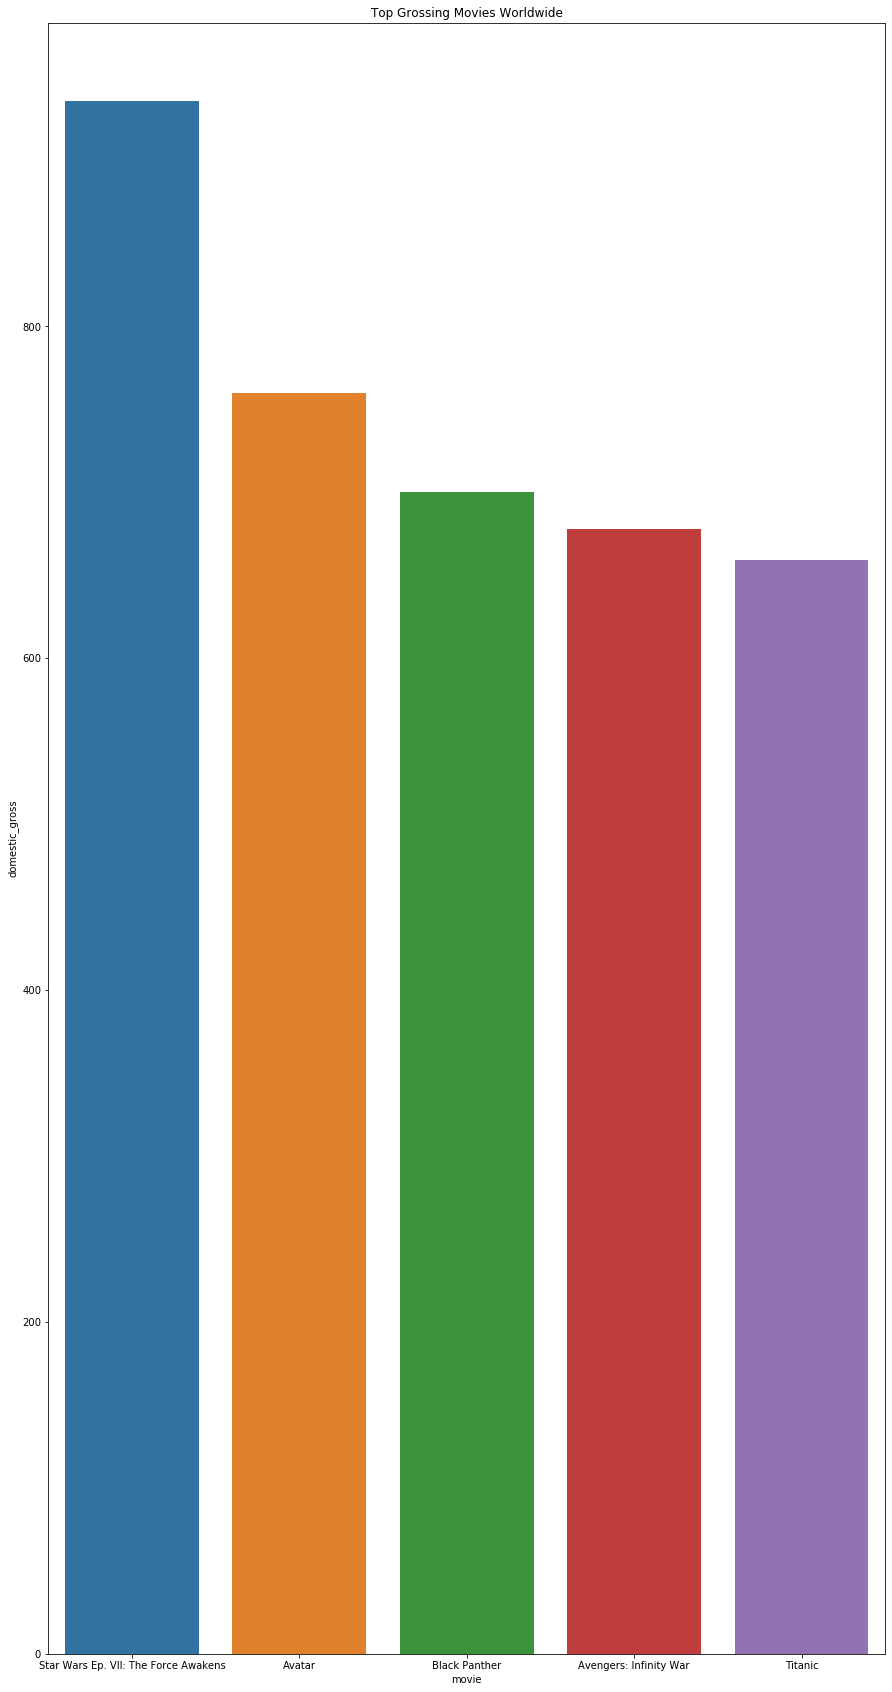

In [22]:
plt.figure(figsize=(15, 30))

plt.title('Top Grossing Movies Worldwide')
plt.xlabel('Movies')
plt.ylabel = ('Gross in $100 million')
sns.barplot(x=tn_mov_budgets['movie'][0:5], y=tn_mov_budgets['domestic_gross'][0:5]//1000000)

plt.show()


<img src="https://media.boingboing.net/wp-content/uploads/2015/10/star-wars-force-awakens-official-poster.jpg" alt="A" title="Jedi" />

As we can see, the highest grossing film is Star Wars Ep VII: The Force Awakens.
Knowing this vital information allows us to research what made this movie such a success at the box office.
This leads us to our next question.

### Question 2

What is the highest grossing film worlwide?

We will start by once again removing "$" and commas to set our values to integers.

In [23]:
tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].str.replace('$', '')
tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].str.replace(',', '')

tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].astype(np.int64)

In descending order, we now have our top grossing films worldwide.

In [24]:
tn_mov_budgets = tn_mov_budgets.sort_values(by= 'worldwide_gross', ascending= False)

Let's double check ourselves.

In [25]:
tn_mov_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279
43,"Dec 19, 1997",Titanic,"$200,000,000",659363944,2208208395
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225,2053311220
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482,2048134200
34,"Jun 12, 2015",Jurassic World,"$215,000,000",652270625,1648854864
67,"Apr 3, 2015",Furious 7,"$190,000,000",353007020,1518722794
27,"May 4, 2012",The Avengers,"$225,000,000",623279547,1517935897
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,1403013963
42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566,1348258224


#### Question 2: Visualization

As we can see, Avatar is the highest grossing film worldwide.


In [26]:
y_label = [1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000, 5000000000, 10000000000]
x_label = ['Avatar', 'Titanic', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Jurassic World']

TypeError: 'str' object is not callable

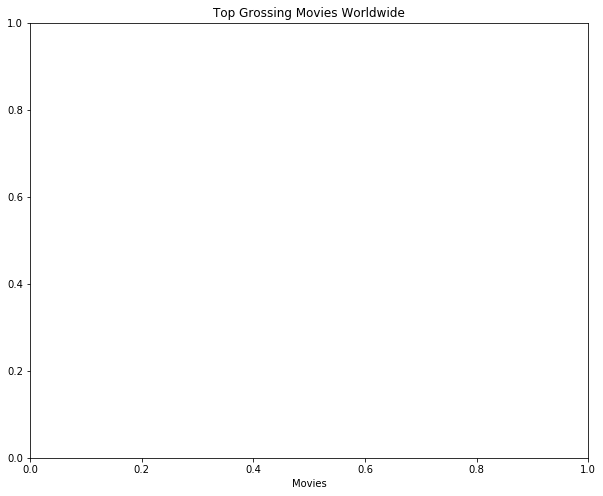

In [27]:
plt.figure(figsize=(10, 8))
ww_gross = tn_mov_budgets['worldwide_gross']
#sns.barplot(x=tn_mov_budgets['movie'][0:5], y=tn_mov_budgets['worldwide_gross'][0:5])
plt.title('Top Grossing Movies Worldwide')
plt.xlabel('Movies')
#define axis
#plt.xticks([x_label, y_label])

plt.ylabel('Worldwide Gross')
plt.hist(ww_gross)
plt.grid(True)
plt.show()


<img src="https://i.ytimg.com/vi/i1BwcCuEOtM/maxresdefault.jpg" alt="A" title="Avatar" />

We now know that the highest grossing film domestically is Star Wars Ep. VII (at $936,662,225) and the highest grossing film globally is Avatar (at $2,776,345,279). The next order of business is to answer a question that will determine which of the two directors to hire for our project. 

## Question 3

Which director is projected to be most profitable?

We can determine director profitability by subtracting production cost from film gross. We will compare overall profit using domestic gross and worldwide gross.

In [28]:
tn_mov_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279
43,"Dec 19, 1997",Titanic,"$200,000,000",659363944,2208208395
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225,2053311220
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482,2048134200
34,"Jun 12, 2015",Jurassic World,"$215,000,000",652270625,1648854864


In [29]:
star_wars_budget = 306000000
avatar_budget = 425000000

##### Question 3.1

Domestically, which movie made more of a profit?

In [ ]:
sw_profit_dom = 936662225 - star_wars_budget
av_profit_dom = 760507625 - avatar_budget
print(sw_profit_dom, ',', av_profit_dom)

Domestically, Star Wars Ep. VII has made more profit.

##### Question 3.2

Globally, which movie made more profit?

In [ ]:
#Star Wars Ep. VII
sw_profit_ww = 2053311220 - star_wars_budget
av_profit_ww = 2776345279 - avatar_budget
print(sw_profit_ww,', ', av_profit_ww)

Globally, Avatar has made more profit.

##### Question 3.3

We see that Star Wars made more profit domestically but Avatar made more globally. Between the domestic and global markets, we can see how much more profit one movie made over the other overall.

In [ ]:
sw_made_more_dom = sw_profit_dom - av_profit_dom
av_made_more_ww = av_profit_ww - sw_profit_ww

print( sw_made_more_dom, ', ', av_made_more_ww )

We can see that Avatar at its peak gross made more budget globally than Star Wars Episode VII at its peak gross domestically. 

#### Question 3: Visualization

In [ ]:
ind = 1
width = 0.35

p1 = plt.bar(ind, sw_made_more_dom, width)
p2 = plt.bar(ind, av_made_more_ww, width)
plt.ylabel('$ in 10 million')
plt.title('Star Wars Ep. VII Vs. Avatar')
plt.legend((p1, p2), ('Star Wars', 'Avatar'))
plt.show()


It was a close decision but we found the director capable of bringing in maximum profits based on their previous success. 

#### Question 3: Final Answer

The answer to our final question:
'Which director should we hire to handle this film?' is 
**James Cameron**, the director of Avatar. 

His name is certainly buzzing in the film community for directing the biggest box office hit globally. Aside from the prestine reputation of a Grade-A director, writter, and editor, we see through our data that he has a high chance to deliver a very sellable product. This, in itself, boosts our firm's chance of gaining a lot of gross with a great profit margin. James Cameron will certainly be a valuable asset in our film's production.

<img src="https://img.thedailybeast.com/image/upload/v1492197619/articles/2014/07/21/james-cameron-dives-into-the-ocean-s-abyss/140719-ramano-james-cameron-tease_nn0wvp.jpg" alt="James Cameron" title="The director of Avatar" />